In [1]:
#Importo las bibliotecas necesarias
import numpy as np, matplotlib.pyplot as plt

In [3]:
#Importo el dataset
from keras.datasets import cifar10

In [5]:
#Cargo la data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [7]:
#Información de las clases del dataset
clases={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [9]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


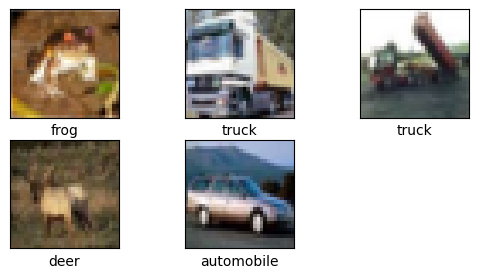

In [11]:
#Plotteo algunas imágenes
for i in range(0,5):
    plt.subplot(3,3,i+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(clases[y_train[i].item()]) #Coloco .item para extraer el valor de cada vector, ya que por defecto está representado por [clase]

In [13]:
#Realizo la normalización de las imágenes para hacer más eficiente el proceso de entrenamiento
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [83]:
#Creo la arquitectura de la red neuronal
from tensorflow import keras
from tensorflow.keras import layers
input=keras.Input(shape=(32,32,3)) #Capa de entrada de la CNN
#Ahora, apilo las siguientes capas de convolución y max-pooling
x=layers.Conv2D(filters=30,kernel_size=3,activation="relu")(input) #Esto hará que el tamaño de la imagen se reduzca
x=layers.MaxPooling2D(pool_size=2)(x) #Aquí se reduce aún más (la mitad), pero uso MaxPooling para solamente extraer las características más importantes de la img
x=layers.Conv2D(filters=60,kernel_size=3,activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=70,kernel_size=3,activation="relu")(x)
x=layers.Flatten()(x)
output=layers.Dense(10,activation="softmax")(x)
modelo=keras.Model(input,output)

In [85]:
#Summary del modelo
modelo.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 60)     │        16,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 70)       │        37,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        11,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,180 (258.52 KB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
#Divido la data de train en train y val para ver el performance durante el entrenamiento y ver si está ocurriendo over/underfitting
x_val,x_train_new=x_train[:10000],x_train[10000:]
y_val,y_train_new=y_train[:10000],y_train[10000:]
print(x_train_new.shape,y_train_new.shape)
print(x_val.shape,y_val.shape)

(40000, 32, 32, 3) (40000, 1)
(10000, 32, 32, 3) (10000, 1)


In [89]:
#Entreno el modelo con los datos de train (solo usaré test para hacer predicciones, no usaré validación)
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", #Los labels son datos numéricos
    metrics=["accuracy"]
)

In [91]:
history=modelo.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=8,
    batch_size=30
)

Epoch 1/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.3732 - loss: 1.7183 - val_accuracy: 0.5284 - val_loss: 1.3244
Epoch 2/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.5928 - loss: 1.1487 - val_accuracy: 0.6454 - val_loss: 0.9962
Epoch 3/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.6619 - loss: 0.9652 - val_accuracy: 0.7107 - val_loss: 0.8349
Epoch 4/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.7019 - loss: 0.8706 - val_accuracy: 0.7155 - val_loss: 0.8104
Epoch 5/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7242 - loss: 0.8024 - val_accuracy: 0.7229 - val_loss: 0.7867
Epoch 6/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.7409 - loss: 0.7381 - val_accuracy: 0.7597 - val_loss: 0.6832
Epoch 7/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7600 - loss: 0.6832 - val_accuracy: 0.7860 - val_loss: 0.6241
Epoch 8/8
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7785 - loss: 0

In [93]:
print(history.history)

{'accuracy': [0.4641000032424927, 0.6102200150489807, 0.6655200123786926, 0.6984400153160095, 0.7214800119400024, 0.7399600148200989, 0.7537599802017212, 0.772059977054596], 'loss': [1.4894706010818481, 1.1090437173843384, 0.9542088508605957, 0.8703815340995789, 0.8033450245857239, 0.7453238368034363, 0.702766478061676, 0.6598758697509766], 'val_accuracy': [0.5284000039100647, 0.6453999876976013, 0.7106999754905701, 0.715499997138977, 0.7228999733924866, 0.7597000002861023, 0.7860000133514404, 0.8007000088691711], 'val_loss': [1.3244366645812988, 0.9962311387062073, 0.8349218964576721, 0.8103540539741516, 0.7866981029510498, 0.6832090020179749, 0.6241449117660522, 0.5769698619842529]}


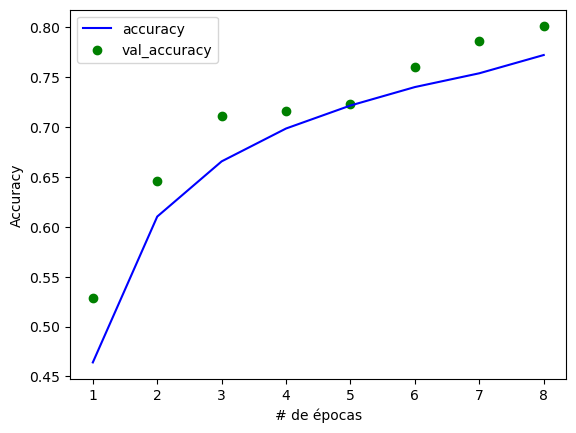

In [95]:
#Gráficas del loss y accuracy para la data de train y validación
#Accuracy
accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
epocas_accuracy=range(1,len(accuracy)+1)

plt.plot(epocas_accuracy,accuracy,label="accuracy",color="blue")
plt.scatter(epocas_accuracy,val_accuracy,label="val_accuracy",color="green")
plt.xlabel("# de épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

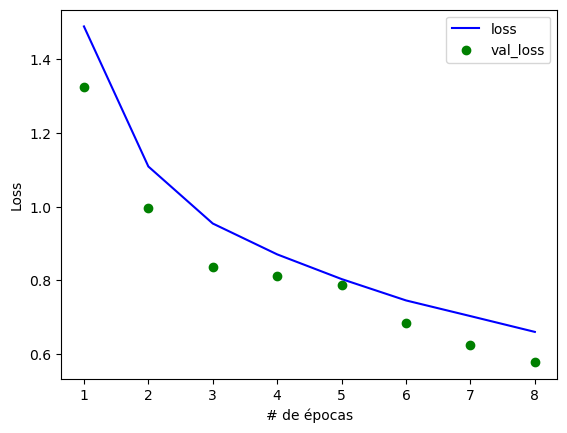

In [97]:
#Loss
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epocas_loss=range(1,len(loss)+1)

plt.plot(epocas_loss,loss,label="loss",color="blue")
plt.scatter(epocas_loss,val_loss,label="val_loss",color="green")
plt.xlabel("# de épocas")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [99]:
#Realizo predicciones con el modelo y luego usaré una matriz de confusión para ver los resultados
val_pred=modelo.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [101]:
#Empleo la matriz de confusión para ver la cantidad de aciertos
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,precision_score,recall_score
#Convierto a vectores, porque la matriz de confusión de sklearn recibe como inputs vectores para formar la confusion matrix
clases_predichas=np.argmax(val_pred,axis=1)
clases_reales=y_test.reshape(y_test.shape[0],)

In [103]:
#Almaceno la matriz de confusión en una variable para luego graficarla
c_m=confusion_matrix(clases_reales,clases_predichas)

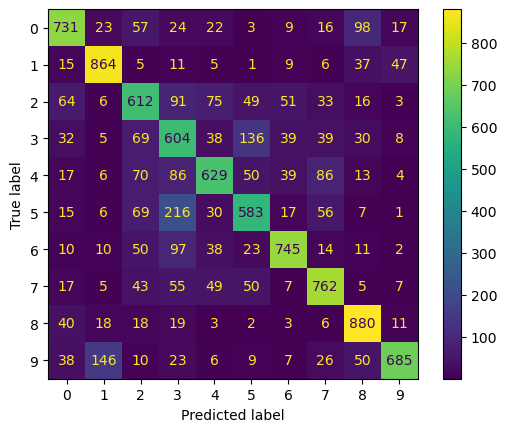

In [105]:
c_m_d=ConfusionMatrixDisplay(c_m)
c_m_d.plot()

In [107]:
accuracy=accuracy_score(clases_predichas,clases_reales)
print("accuracy:",accuracy)

accuracy: 0.7095


In [109]:
precision=precision_score(clases_predichas,clases_reales,average="macro") #De los elementos que la red predijo como positivos (pertenecientes a una clase) cuántos son realmente positivos.
print("precision:",precision) #TP/(TP+FP); TP: True positive, FP: False positive

precision: 0.7095


In [111]:
recall=recall_score(clases_predichas,clases_reales,average="macro") #De todos los positivos, cuántos la red dijo correctamente que eran positivos
print("recall:",recall) #TP/(TP+FN)

recall: 0.7163429407249662


### Luego de probar con diferentes hiperparámetros, a partir de la época 9 empieza el modelo a sobreajustarse (se vio evidenciado en las gráficas). Por lo que, finalmente, el modelo fue entrenado con 8 épocas

### Además, elegí el optimizador "Adam" (hiperparámetro fundamental que influirá en el rendimiento final de la red)